In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [148]:
df = pd.read_csv('monroe county car crach 2003-2015.csv', encoding='latin1')
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB


In [150]:
df.duplicated().sum()

64

In [151]:
df = df.drop_duplicates()

In [152]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1119
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

In [184]:
df.dropna(inplace=True)
df.shape

(52520, 11)


(52520, 11)

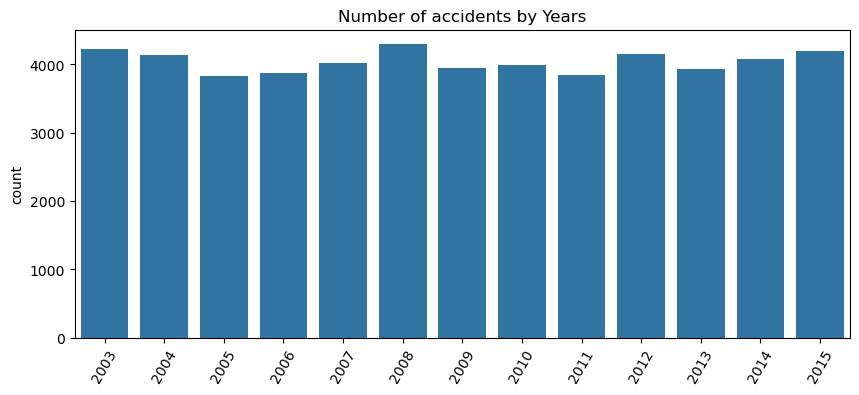

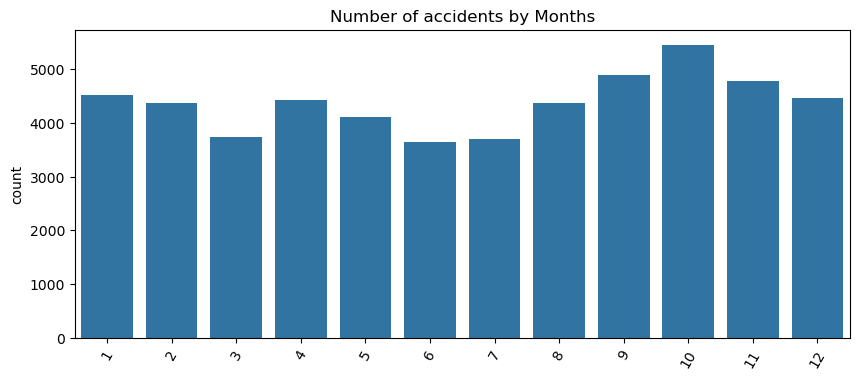

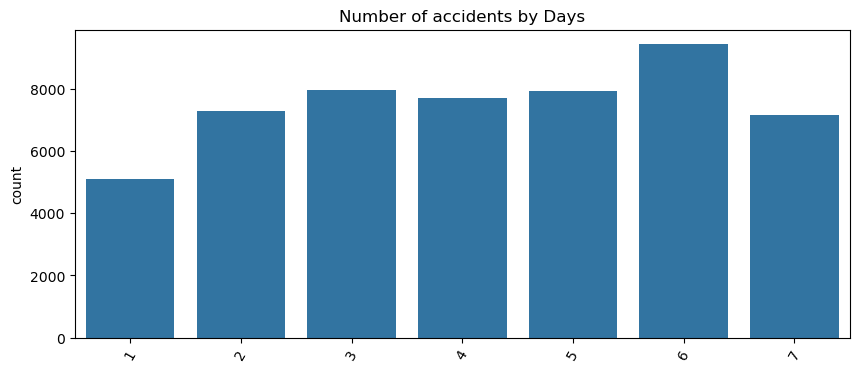

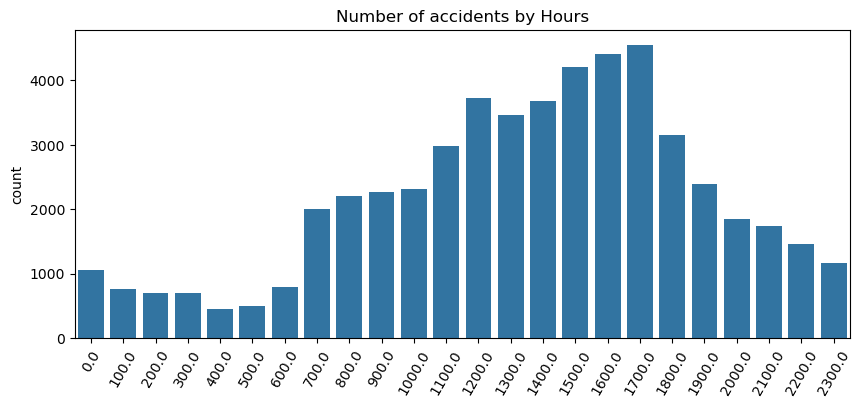

In [154]:
group_list = ["Year", "Month", "Day", "Hour"]

for i in group_list:
    grouped = df.groupby(i)[i].count().reset_index(name="count")
    plt.figure(figsize=(10,4))
    sns.barplot(data=grouped, x= i, y="count")
    plt.title(f"Number of accidents by {i}s")
    plt.xticks(rotation=60)
    plt.xlabel("")
    plt.show()


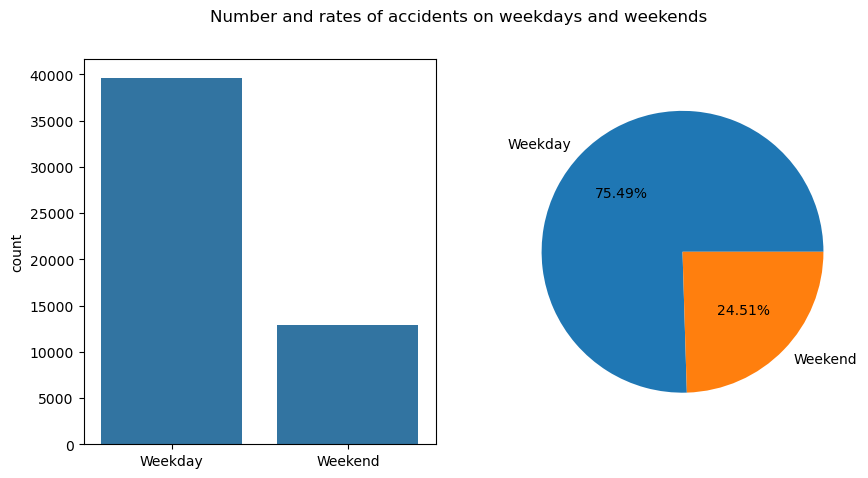

In [186]:
grouped_week = df.groupby("Weekend?")["Weekend?"].count().reset_index(name="count")
grouped_week
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x=grouped_week["Weekend?"], y=grouped_week["count"])
plt.xlabel("")
plt.subplot(1,2,2)
plt.pie(x=grouped_week["count"], labels=grouped_week["Weekend?"],autopct='%0.2f%%')
plt.suptitle("Number and rates of accidents on weekdays and weekends")
plt.show()


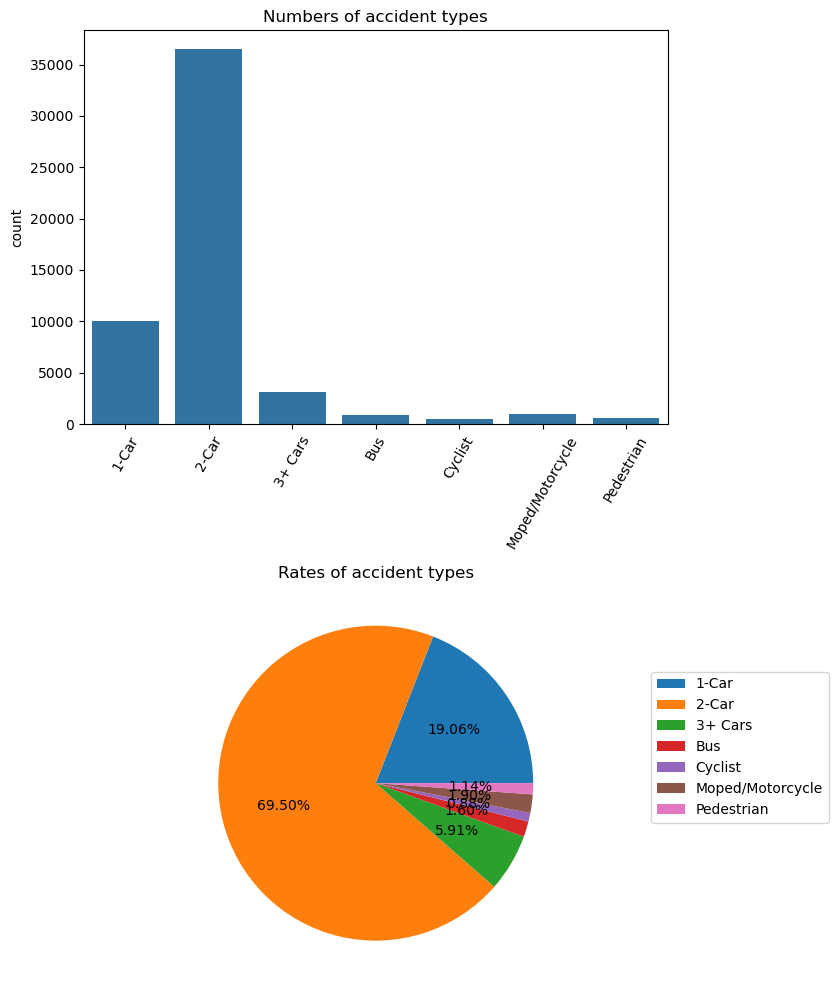

In [190]:
grouped_collision_type = df.groupby("Collision Type").size().reset_index(name="count")
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
sns.barplot(x=grouped_collision_type["Collision Type"], y=grouped_collision_type["count"])
plt.xlabel("")
plt.xticks(rotation=60)
plt.title("Numbers of accident types")
plt.subplot(2,1,2)
plt.pie(x=grouped_collision_type["count"], autopct='%0.2f%%')
plt.legend(loc=(1.2, 0.4), labels=grouped_collision_type["Collision Type"])
plt.title("Rates of accident types")
plt.tight_layout()
plt.show()


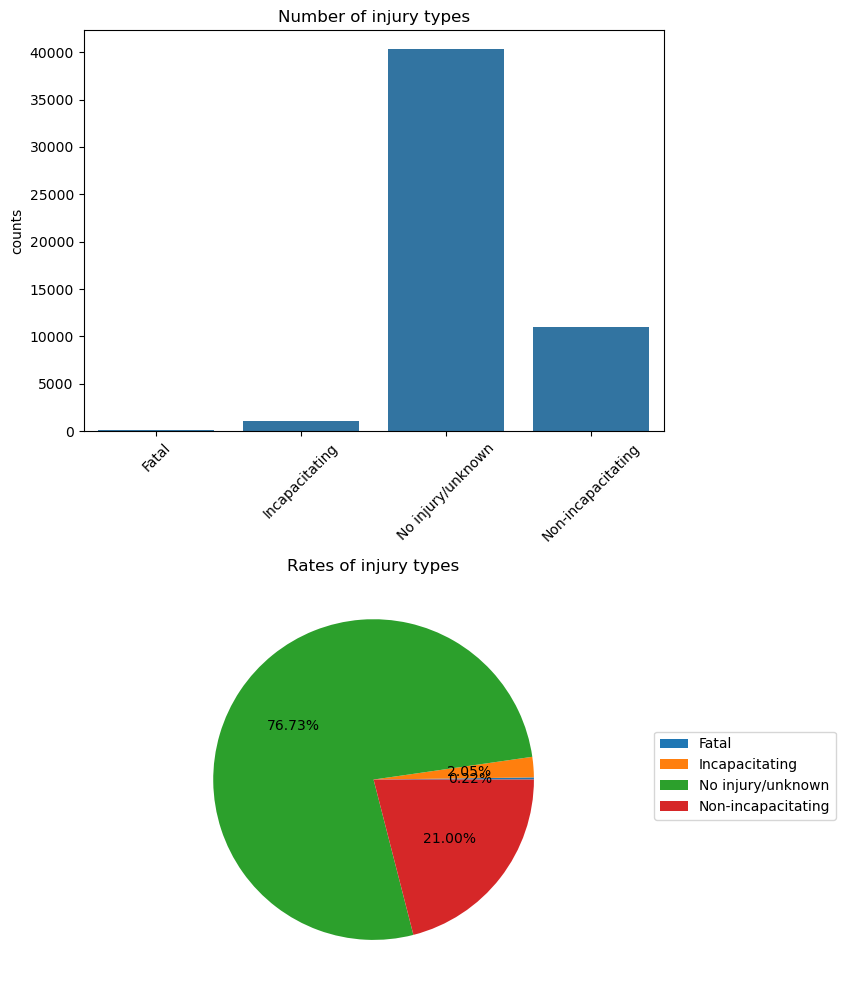

In [192]:
grouped_injury_type = df.groupby("Injury Type").size().reset_index(name="counts")
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
sns.barplot(x=grouped_injury_type["Injury Type"], y=grouped_injury_type["counts"])
plt.xlabel("")
plt.xticks(rotation=45)
plt.title("Number of injury types")
plt.subplot(2,1,2)
plt.pie(x=grouped_injury_type["counts"], autopct='%0.2f%%')
plt.legend(loc=(1.2, 0.4), labels=grouped_injury_type["Injury Type"])
plt.title("Rates of injury types")
plt.tight_layout()
plt.show()


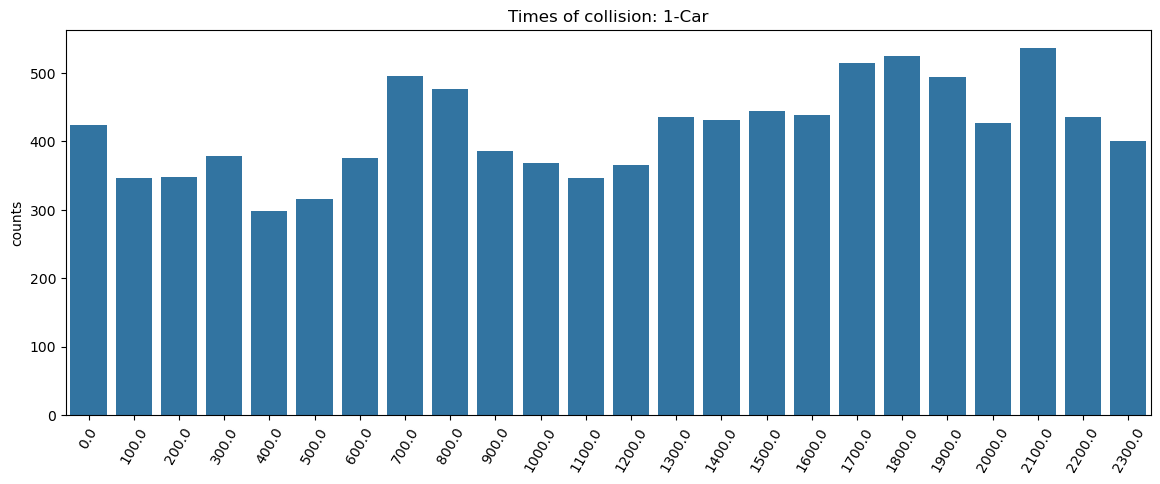

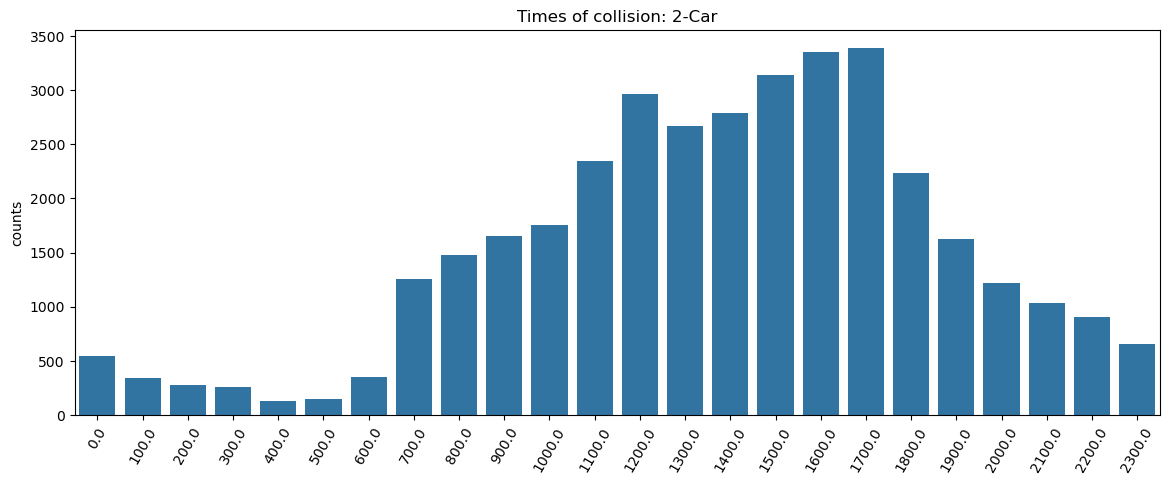

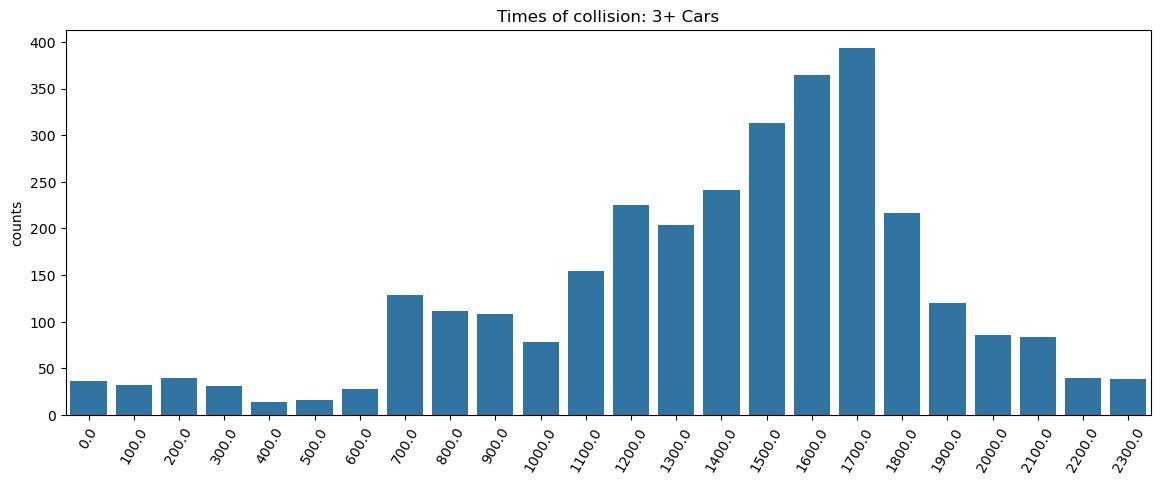

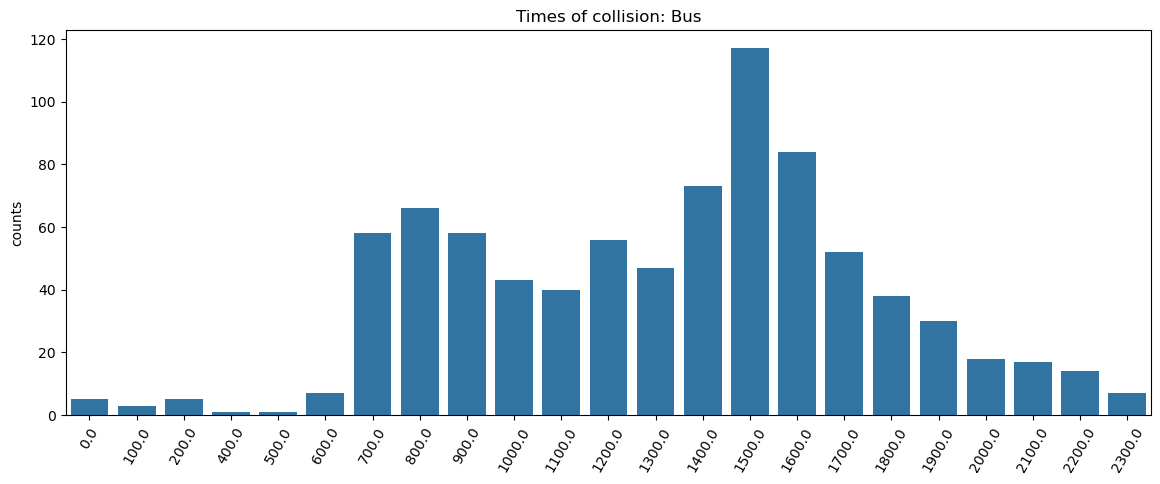

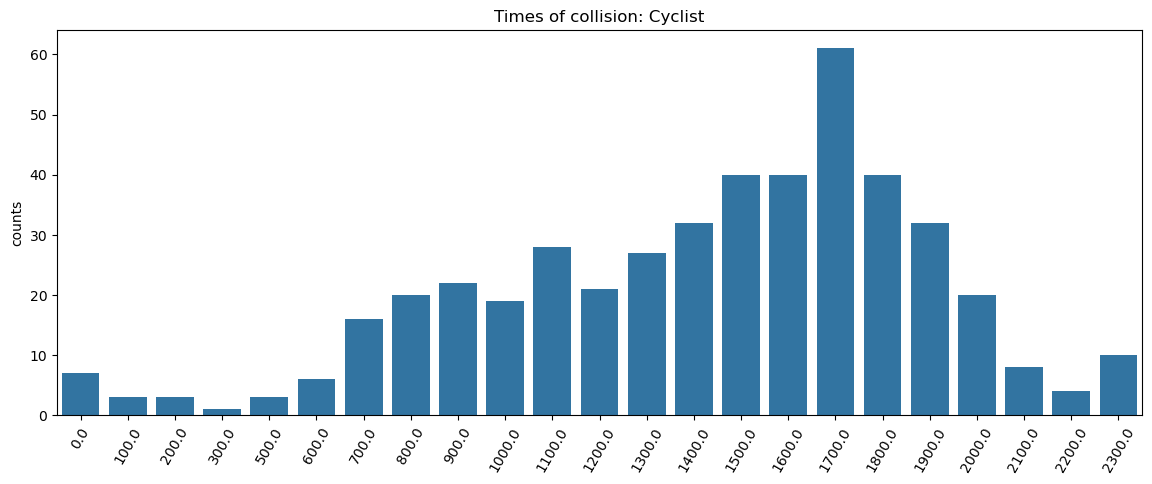

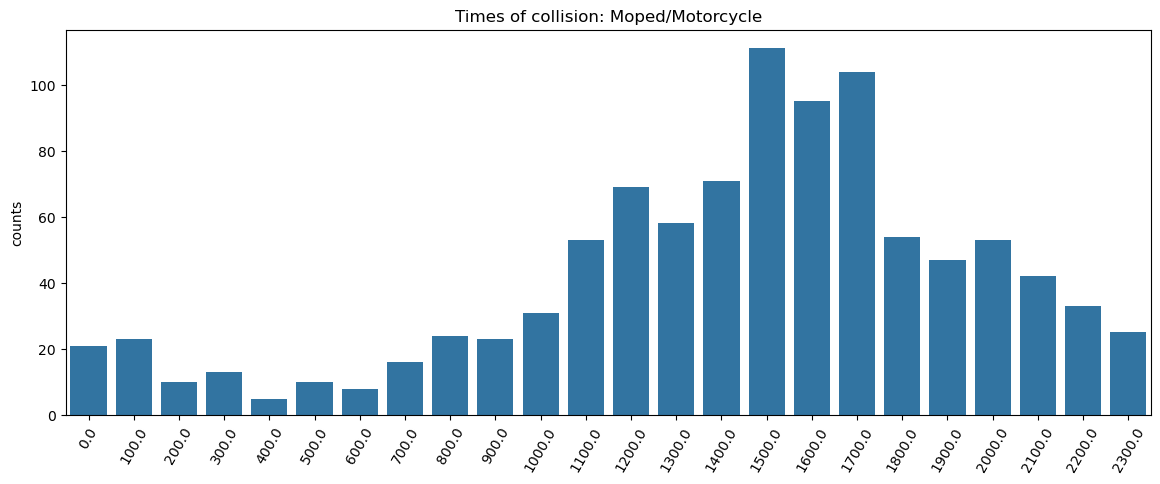

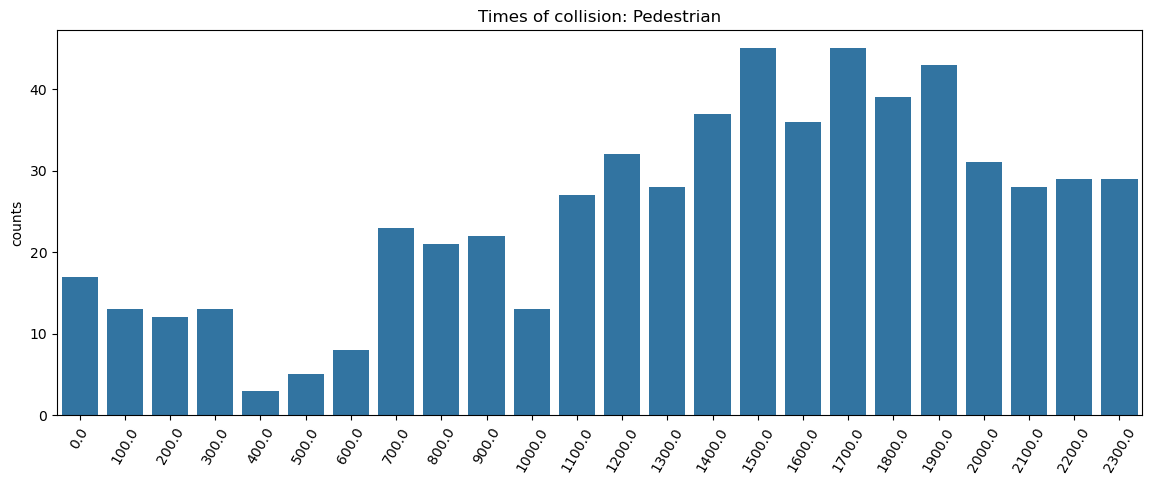

In [158]:
grouped_Collision = df.groupby(["Collision Type", "Hour"]).size().reset_index(name="counts")
for i in grouped_Collision["Collision Type"].unique():
    collision_type = grouped_Collision[grouped_Collision["Collision Type"] == i]
    
    plt.figure(figsize=(14,5))
    sns.barplot(data=collision_type, x="Hour", y="counts")
    plt.title(f"Times of collision: {i}")
    plt.xlabel("")
    plt.xticks(rotation=60)
    plt.show()


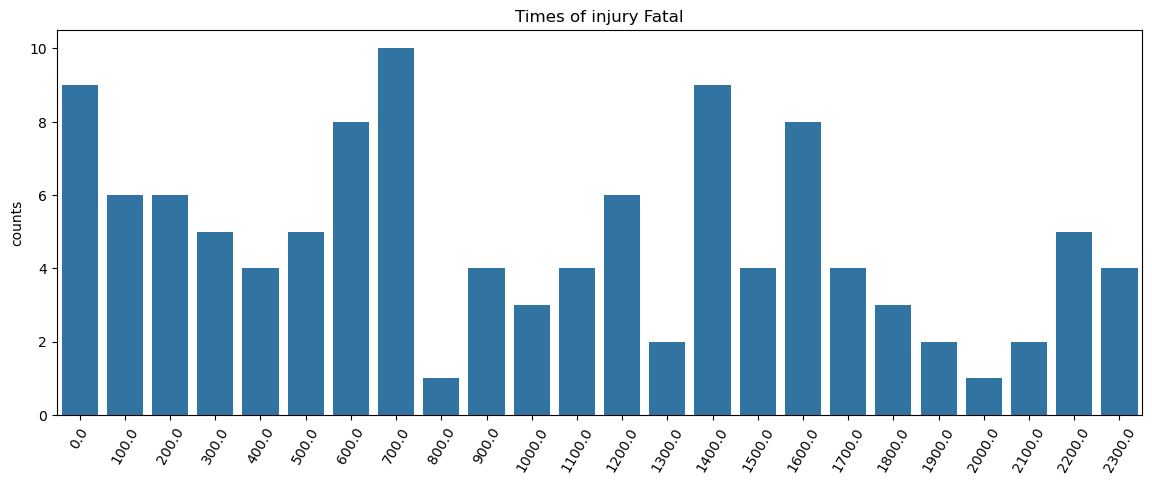

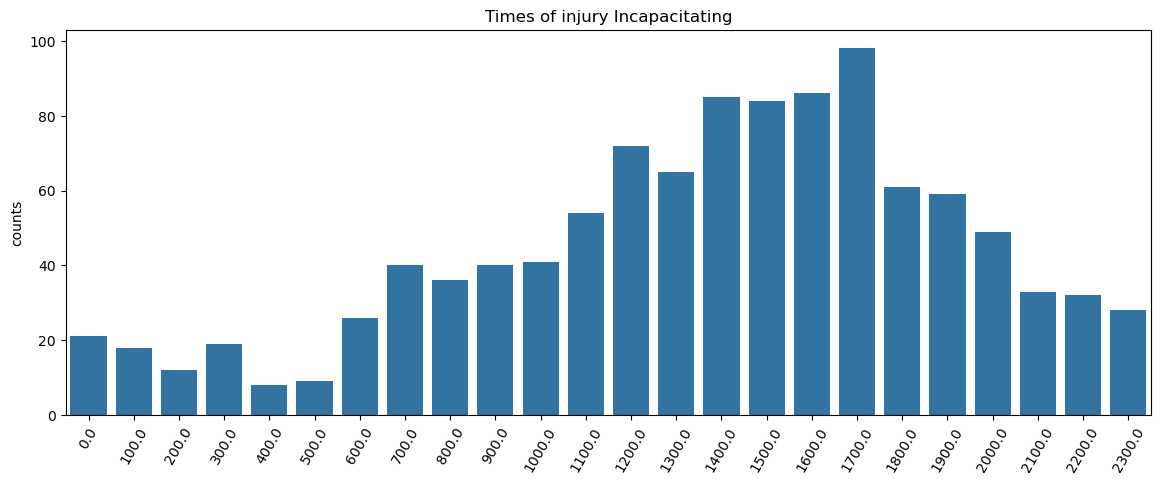

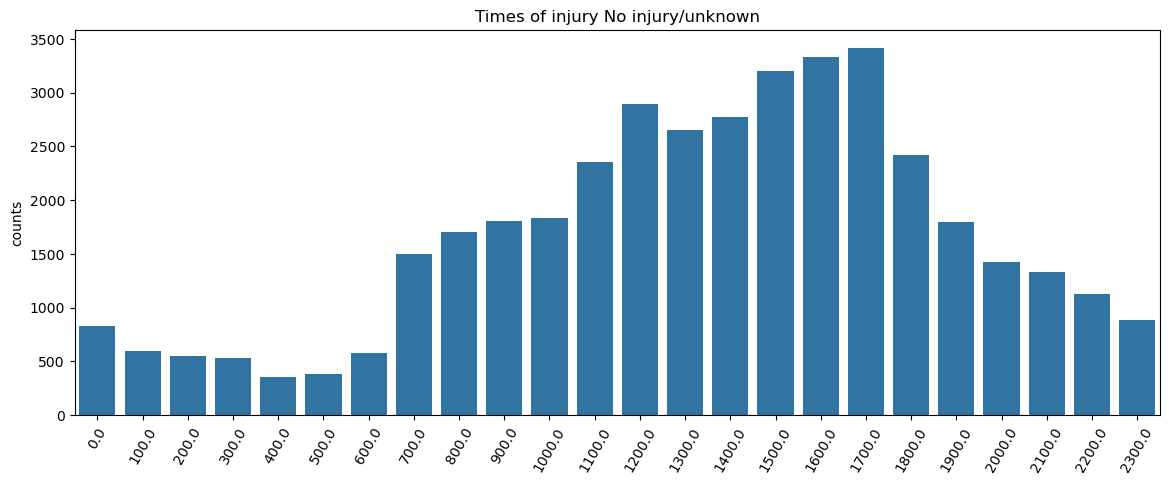

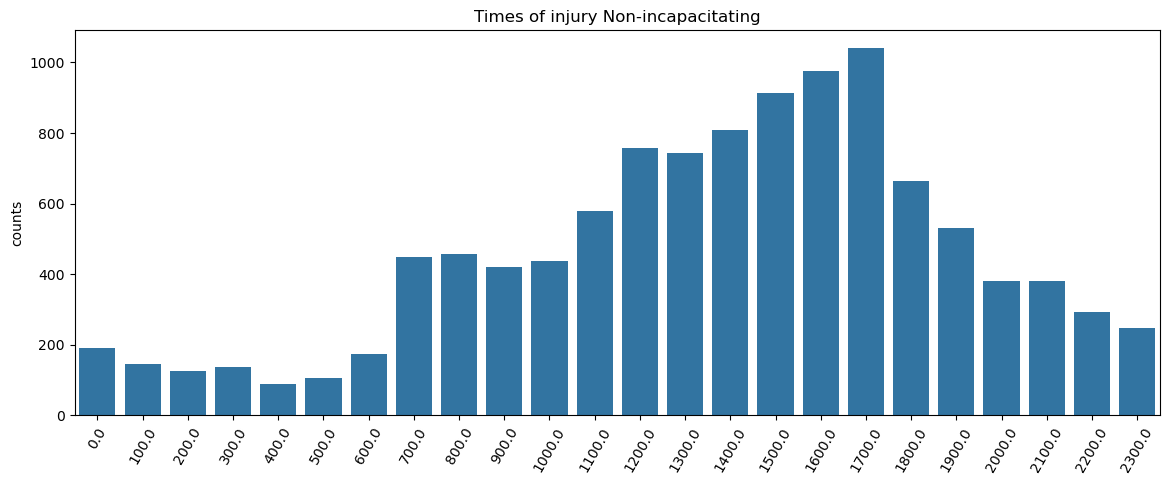

In [159]:
grouped_injury_types = df.groupby(["Injury Type", "Hour"]).size().reset_index(name="counts")
for i in grouped_injury_types["Injury Type"].unique():
    injury_type = grouped_injury_types[grouped_injury_types["Injury Type"] == i]
    
    plt.figure(figsize=(14,5))
    sns.barplot(data=injury_type, x="Hour", y="counts")
    plt.title(f"Times of injury {i}")
    plt.xlabel("")
    plt.xticks(rotation=60)
    plt.show()


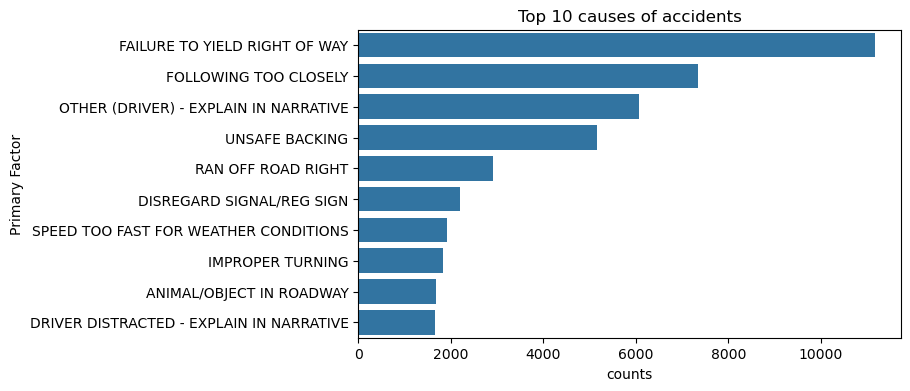

In [160]:
grouped_primary_factor = df.groupby("Primary Factor").size().reset_index(name="counts")
grouped_primary_factor = grouped_primary_factor.sort_values(by="counts", ascending=False).head(10)
plt.figure(figsize=(7,4))
sns.barplot(data=grouped_primary_factor, x="counts", y="Primary Factor")
plt.title("Top 10 causes of accidents")
plt.show()


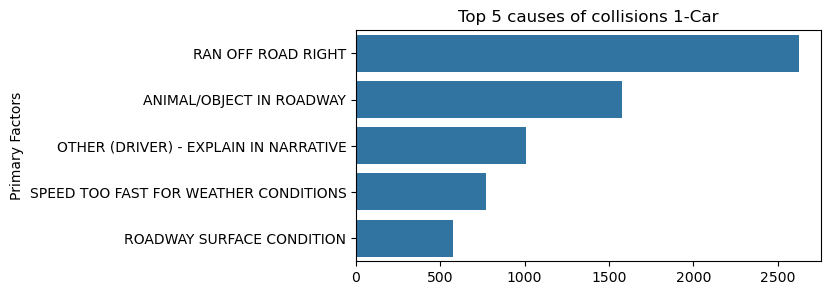

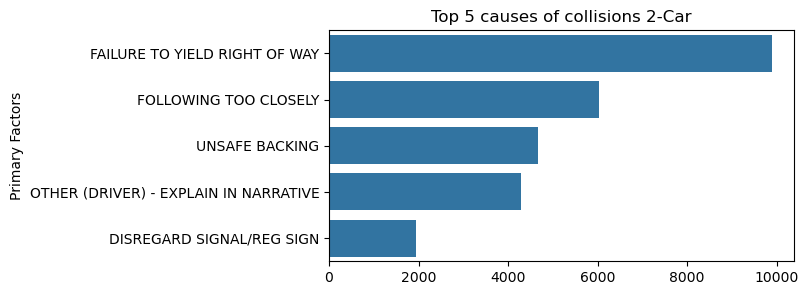

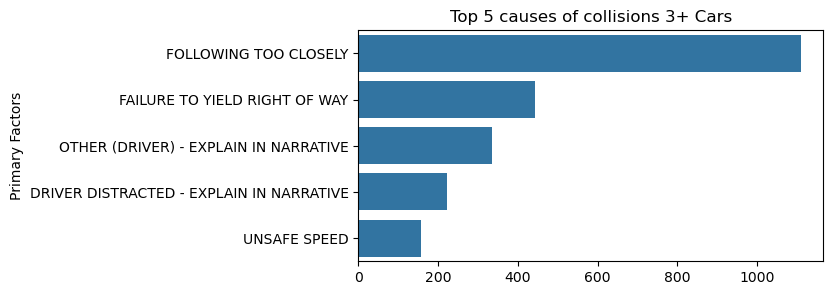

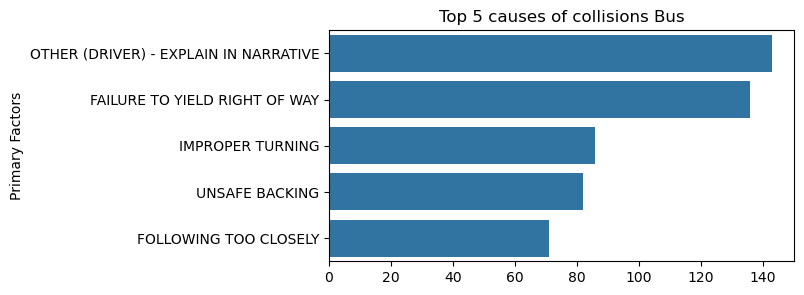

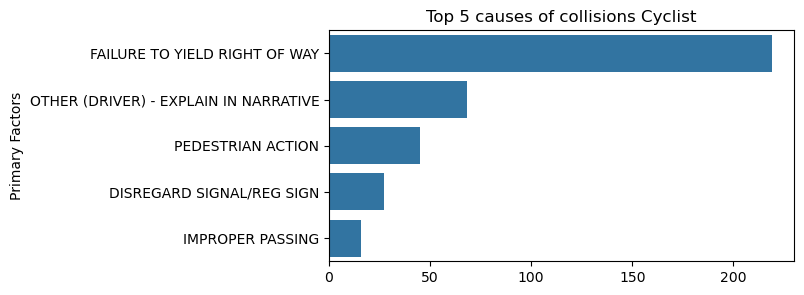

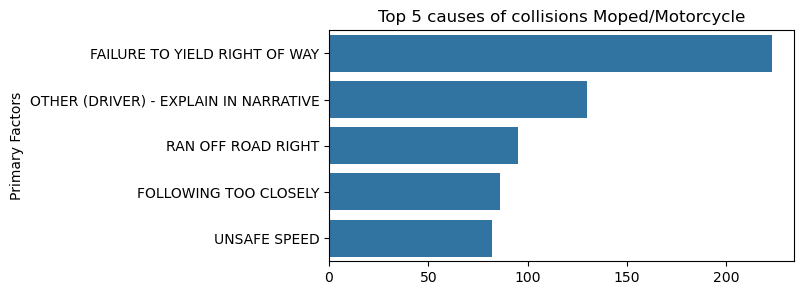

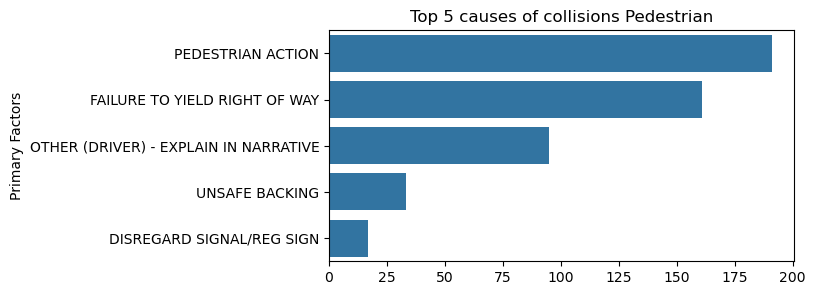

In [161]:
grouped_colision_factors = df.groupby(["Collision Type", "Primary Factor"]).size().reset_index(name="counts")
for i in grouped_colision_factors["Collision Type"].unique():
    grouped_collision = grouped_colision_factors[grouped_colision_factors["Collision Type"] == i]
    grouped_collision = grouped_collision.sort_values(by="counts", ascending=False).head(5)
    plt.figure(figsize=(6,3))
    sns.barplot(data=grouped_collision, x="counts", y="Primary Factor")
    plt.ylabel("Primary Factors") 
    plt.xlabel("")
    plt.title(f"Top 5 causes of collisions {i}") 
    plt.show()


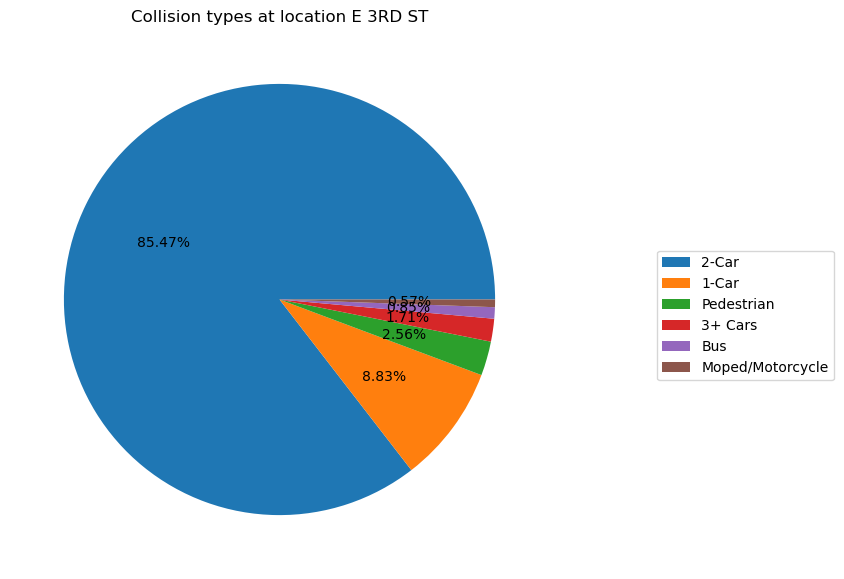

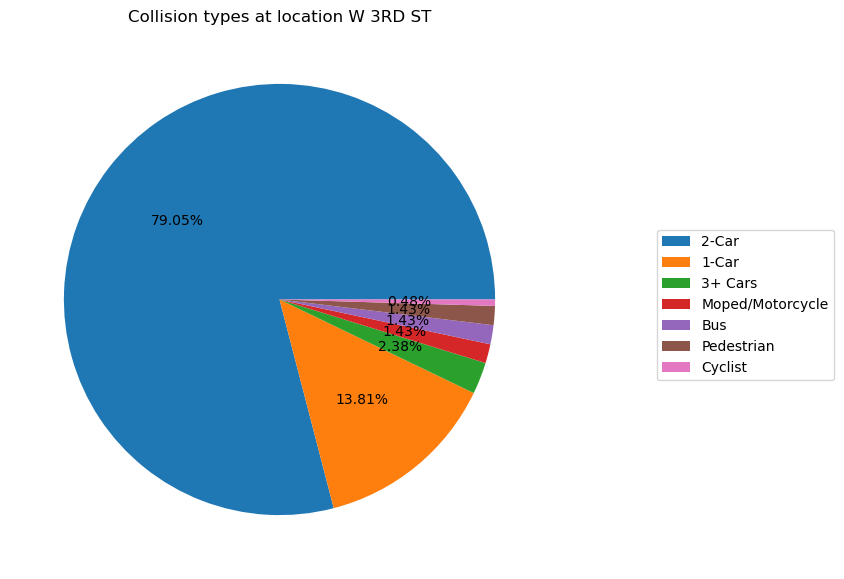

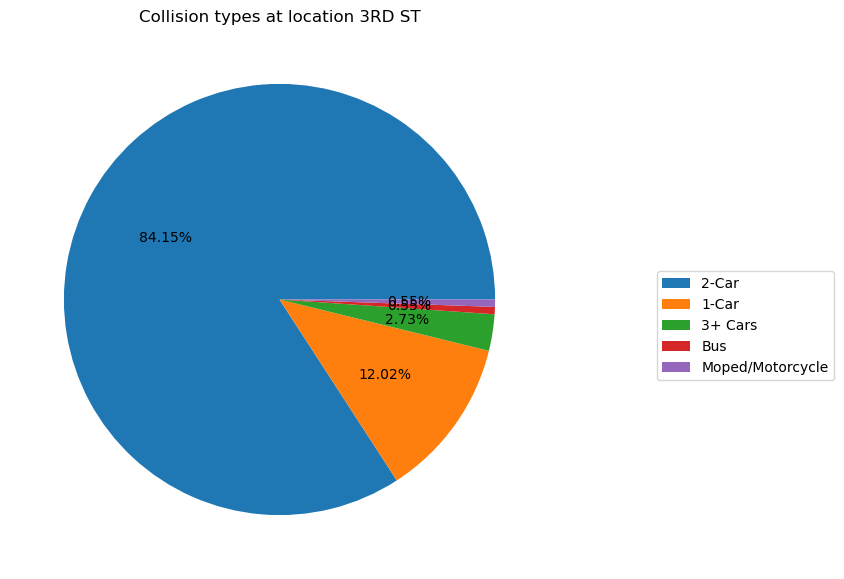

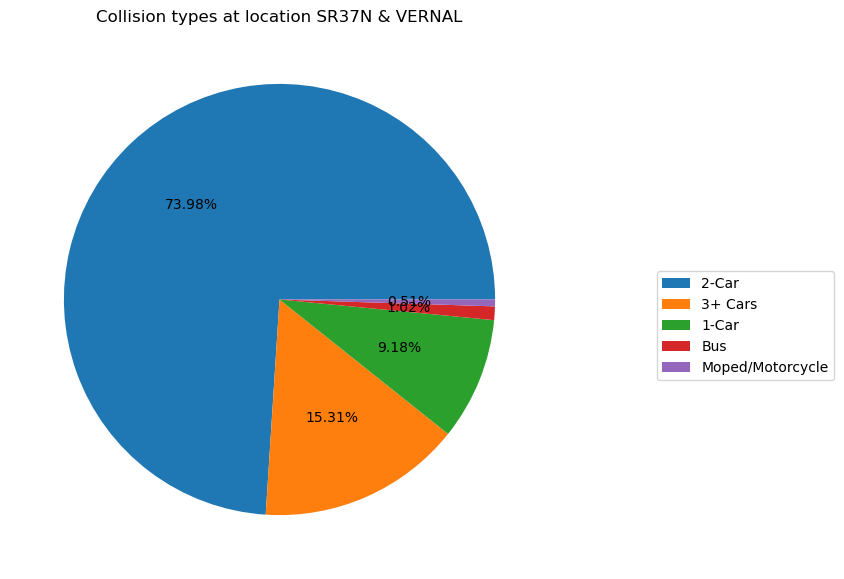

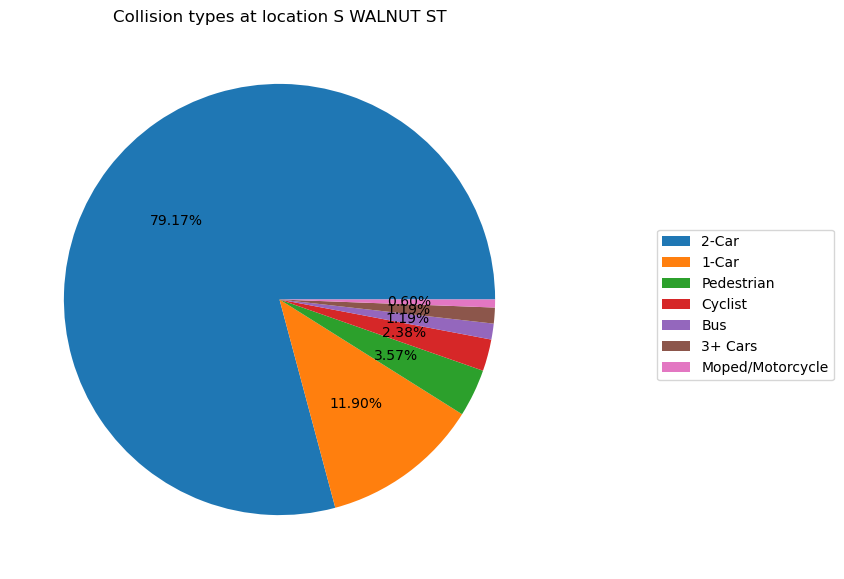

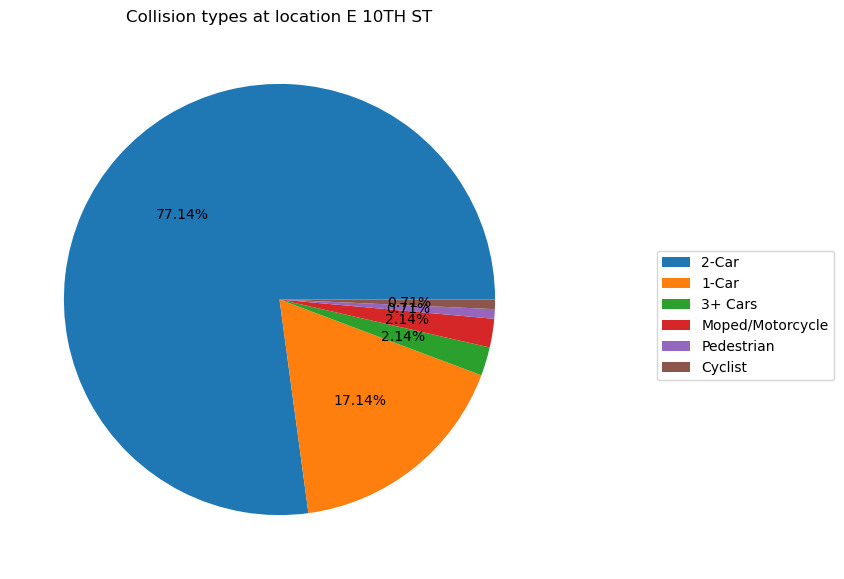

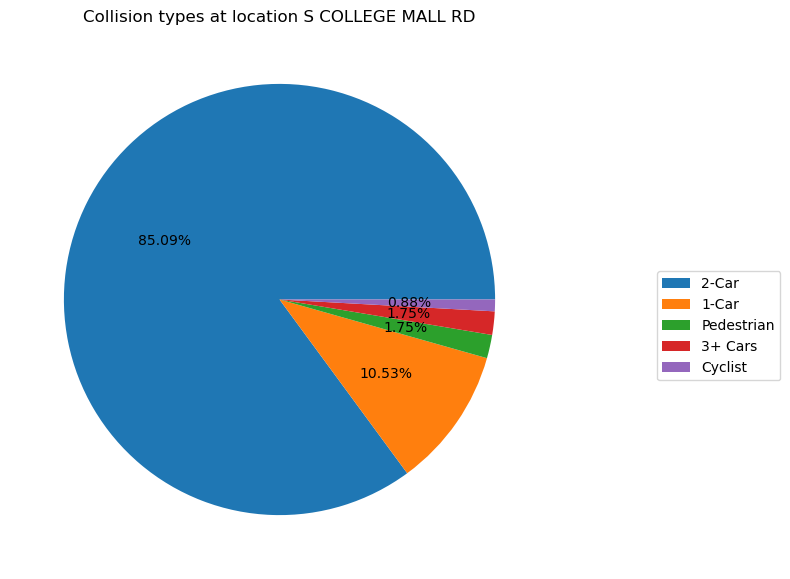

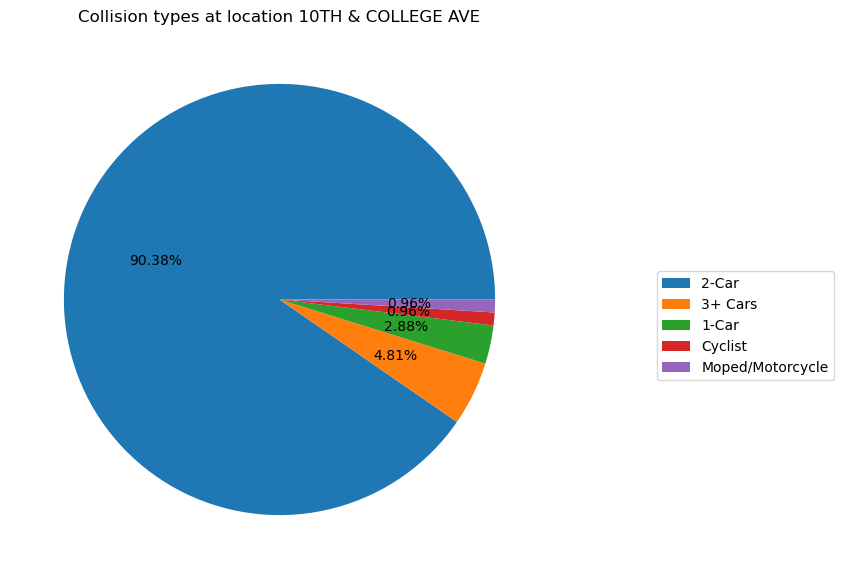

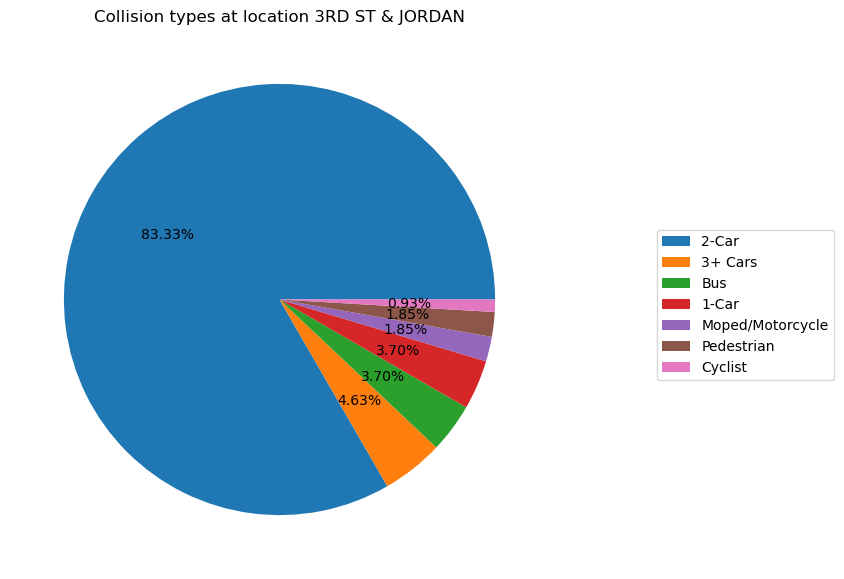

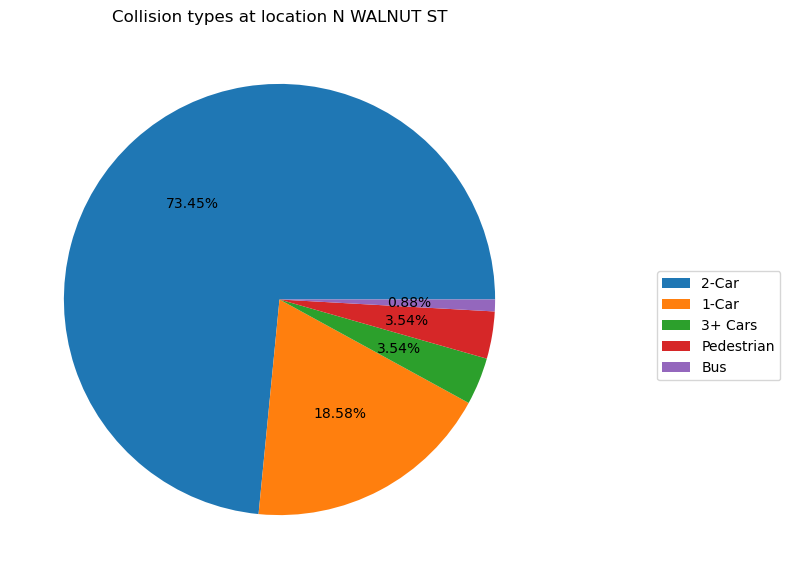

In [194]:
Top10_reported_location = df.groupby(["Reported_Location", "Collision Type"])["Reported_Location"].count().reset_index(name="counts")
Top10_reported_location = Top10_reported_location.sort_values(by="counts", ascending=False)
location_list = Top10_reported_location.head(10).Reported_Location.values
for i in location_list:
    grouped = Top10_reported_location[Top10_reported_location.Reported_Location == i]
    
    plt.figure(figsize=(7,7))
    plt.pie(x=grouped["counts"], autopct='%0.2f%%')
    plt.legend(labels=grouped["Collision Type"], loc= (1.2,0.35))
    plt.title(f"Collision types at location {i}")
    plt.show()


In [223]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import time

In [235]:
start_time = time.time()
X = df.drop('Injury Type', axis=1)
y = df['Injury Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
end_time = time.time()  
print(f"Elapsed time: {end_time - start_time:.4f} seconds")

Accuracy: 0.7941736481340441
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.32      0.03      0.05       218
           2       0.81      0.98      0.88      8101
           3       0.62      0.20      0.30      2172

    accuracy                           0.79     10504
   macro avg       0.44      0.30      0.31     10504
weighted avg       0.76      0.79      0.74     10504

Elapsed time: 58.0101 seconds
